# UCMR5 DATA Inspection
-  I filtered the UCMR5 dataset to include only the contaminants PFOS and PFOA because it's easier to work with.

In [1]:
# Load necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
ucmr5 = pd.read_csv("ucmr5_pfoa_pfos_clean.csv")

In [3]:
# Quick Look at Random 10 Rows from the file
ucmr5.sample(10)

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
16327,CA3410001,SACRAMENTO SUBURBAN WATER DISTRICT,L,81851,Well 4B (Bell/Marconi),GW,3410001189,EP #189 - Well 4B Treated,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE2,AM,9,CA,NaN
39653,IN5240008,NORTH VERNON WATER DEPARTMENT,S,IN002,NORTH VERNON WATER DEPARTMENT,SW,EP002,QUARRY INTAKE,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,5,IN,NaN
39692,IN5241015,CAMP ATTERBURY,S,CC002,Princess Lakes Connection,GW,EP001,EGGELSTON RD,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,5,IN,NaN
73924,NY5110526,SUFFOLK COUNTY WATER AUTHORITY,L,00643,Oxhead Rd. Wellfield,GW,00643EP,Oxhead Rd. #3,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,2,NY,NaN
75345,OH2861312,TIMMONS ELEMENTARY SCHOOL,S,20001,Timmons Elementary School,GW,EP001,Timmons Elect. Room Bathroom,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE2,AM,5,OH,NaN
111901,WV3301109,GILMER COUNTY PSD - NORMANTOWN STUMPTOWN,S,10001,Glenville Connection,SW,EP001,Buttermilk Pump Station,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE2,AM,3,WV,NaN
91797,TX0430055,NORTH COLLIN SUD,S,EP001,NORTH COLLIN SUD,SW,TRTTAP,"2720 CR 330 McKinney, TX 75069",EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE4,AM,6,TX,NaN
24469,CO0235182,CSU FOOTHILLS CAMPUS,S,1428,RIC building 1428,SW,CC001,RIC building 1st floor rr,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,8,CO,NaN
103633,UTAH24013,ASHLEY VALLEY WATER AND SEWER ID,L,WS002,ASHLEY VALLEY WATER AND SEWER ID,SW,WS002,UTAH24038 CENTRAL UTAH-ASHLEY VALLEY,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE2,AM,8,UT,NaN
28558,FL5110183,MARCO ISLAND UTILITIES (CITY OF),L,00002,Marco Island RO WTP,MX,183002,Marco Island RO WTP POE,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE3,AM,4,FL,NaN


In [4]:
# Shape of the data
ucmr5.shape

(112752, 24)

In [5]:
# Remove these columns with 100% missing values
ucmr5 = ucmr5.drop(columns=['AssociatedFacilityID', 'AssociatedSamplePointID', 'UCMR1SampleType'])

In [6]:
# Data info
ucmr5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112752 entries, 0 to 112751
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PWSID                  112752 non-null  object 
 1   PWSName                112752 non-null  object 
 2   Size                   112752 non-null  object 
 3   FacilityID             112748 non-null  object 
 4   FacilityName           112748 non-null  object 
 5   FacilityWaterType      112752 non-null  object 
 6   SamplePointID          112752 non-null  object 
 7   SamplePointName        112752 non-null  object 
 8   SamplePointType        112752 non-null  object 
 9   CollectionDate         112752 non-null  object 
 10  SampleID               112752 non-null  object 
 11  Contaminant            112752 non-null  object 
 12  MRL                    112752 non-null  float64
 13  Units                  112752 non-null  object 
 14  MethodID               112752 non-nu

- AnalyticalResultsSign Sign indicating whether the analytical result is less than (<) the UCMR 5 MRL or equal to (=) a numeric value at or above the UCMR 5 MRL
- AnalyticalResultValue Numeric value of the analytical result in µg/L for the contaminants. Null (or blank) values represent results less than the UCMR 5 MRL

In [7]:
print('--------Before---------')
print(ucmr5['AnalyticalResultsSign'].value_counts())
print()
print(f"Total Samples: {len(ucmr5)}")
print(f"Non-detects: (Analytical Result Value has no value) -> {ucmr5['AnalyticalResultValue'].isna().sum()}")
print(f"Detections:(Analytical Result Value has value) -> {ucmr5['AnalyticalResultValue'].notna().sum()}")
print(f"Detection rate: {(ucmr5['AnalyticalResultValue'].notna().sum() / len(ucmr5)) * 100:.2f}%")

--------Before---------
AnalyticalResultsSign
<    105160
=      7592
Name: count, dtype: int64

Total Samples: 112752
Non-detects: (Analytical Result Value has no value) -> 105160
Detections:(Analytical Result Value has value) -> 7592
Detection rate: 6.73%


In [8]:
# Summary stats for AnalyticalResultValue column
ucmr5['AnalyticalResultValue'].describe()

count    7592.000000
mean        0.008964
std         0.010708
min         0.004000
25%         0.004900
50%         0.006400
75%         0.009700
max         0.490000
Name: AnalyticalResultValue, dtype: float64

In [9]:
# Numbber of Unique PWSID
ucmr5['PWSID'].nunique()

9876

In [10]:
# Create Concentration column: detected values stay as-is; non-detects (NaN) replaced with 0
ucmr5['Concentration'] = ucmr5['AnalyticalResultValue'].fillna(0)

In [11]:
# Create system_max table: max concentration of each contaminant per water system (PWSID)
system_max = ucmr5.groupby(['PWSID', 'Contaminant'])['Concentration'].max().unstack().reset_index()

In [12]:
# Set threshold at 80% of 0.004 µg/L (i.e., 0.0032)
threshold = 0.004 * 0.8

# Flag systems where max PFOA or PFOS concentration exceeds threshold
system_max['exceeds_threshold(0.004*0.8)'] = (system_max['PFOA'] > threshold) | (system_max['PFOS'] > threshold)

# Count how many systems exceed the threshold
systems_exceeding = system_max['exceeds_threshold(0.004*0.8)'].sum()

In [13]:
# Quick Look at first 10 Rows from the system_max table
print(system_max.head(10))

Contaminant      PWSID    PFOA  PFOS  exceeds_threshold(0.004*0.8)
0            010106001  0.0074   0.0                          True
1            010109005  0.0000   0.0                         False
2            020000005  0.0000   0.0                         False
3            020000008  0.0000   0.0                         False
4            040000002  0.0000   0.0                         False
5            043740039  0.0000   0.0                         False
6            050593203  0.0000   0.0                         False
7            055293201  0.0000   0.0                         False
8            055293603  0.0000   0.0                         False
9            055293611  0.0000   0.0                         False


In [14]:
print(f"Total systems: {len(system_max)}")
print(f"Systems exceeding threshold: {systems_exceeding}")
print(f"Percentage: {(systems_exceeding / len(system_max) * 100):.1f}%")

Total systems: 9876
Systems exceeding threshold: 1618
Percentage: 16.4%


## Compare UCMR5 Results with SDWA Water Systems
Now that I have calculated the maximum PFAS concentrations for each system (`system_max`), I’ll bring in SDWA Public Water System data to add population served information. This helps us understand how many people are affected by PFAS exceedances across different system sizes.

In [16]:
# Read the SDWA data
sdwa = pd.read_excel("SDWA_PUB_WATER_SYSTEMS.xlsx")

In [17]:
# Quick Look at first few rows of the data
sdwa.head()

,SUBMISSIONYEARQUARTER,PWSID,PWS_NAME,PRIMACY_AGENCY_CODE,EPA_REGION,SEASON_BEGIN_DATE,SEASON_END_DATE,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,...,LAST_REPORTED_DATE,STATE_CODE,SOURCE_WATER_PROTECTION_CODE,SOURCE_PROTECTION_BEGIN_DATE,OUTSTANDING_PERFORMER,OUTSTANDING_PERFORM_BEGIN_DATE,REDUCED_RTCR_MONITORING,REDUCED_MONITORING_BEGIN_DATE,REDUCED_MONITORING_END_DATE,SEASONAL_STARTUP_SYSTEM
0,2025Q2,WA5325264,HANNAH HEIGHTS #2 WATER USERS ASSN,WA,10,NaT,NaT,A,NaT,CWS,...,2025-06-27,WA,NaN,NaT,Y,2024-06-12,NaN,NaT,NaT,NaN
1,2025Q2,LA1119034,GIL-GAL WATER SYSTEM,LA,6,NaT,NaT,A,NaT,CWS,...,2025-06-18,LA,N,NaT,NaN,NaT,NaN,NaT,NaT,NaN
2,2025Q2,NC0120414,THE MOUNTAIN FOLK CENTER,NC,4,2025-01-01,2025-12-31,A,NaT,TNCWS,...,2025-06-26,NC,NaN,NaT,NaN,NaT,NaN,NaT,NaT,NaN
3,2025Q2,AZ0413182,THAI GARDENS,AZ,9,2025-01-01,2025-12-31,A,NaT,TNCWS,...,2025-06-30,AZ,N,NaT,NaN,NaT,NaN,NaT,NaT,NaN
4,2025Q2,LA1073003,BETTER WATERWORKS WATER SYSTEM,LA,6,NaT,NaT,A,NaT,CWS,...,2025-06-18,LA,N,NaT,NaN,NaT,NaN,NaT,NaT,NaN


In [20]:
# Checking if PWSID and POPULATION_SERVED_COUNT have missing value
sdwa.isna().sum()

SUBMISSIONYEARQUARTER                  0
PWSID                                  0
PWS_NAME                             897
PRIMACY_AGENCY_CODE                    0
EPA_REGION                             0
SEASON_BEGIN_DATE                  63559
SEASON_END_DATE                    63559
PWS_ACTIVITY_CODE                      0
PWS_DEACTIVATION_DATE             143268
PWS_TYPE_CODE                          0
DBPR_SCHEDULE_CAT_CODE            395191
CDS_ID                            416626
GW_SW_CODE                          3267
LT2_SCHEDULE_CAT_CODE             430184
OWNER_TYPE_CODE                    49287
POPULATION_SERVED_COUNT                0
POP_CAT_2_CODE                         0
POP_CAT_3_CODE                         0
POP_CAT_4_CODE                         0
POP_CAT_5_CODE                         0
POP_CAT_11_CODE                        0
PRIMACY_TYPE                           0
PRIMARY_SOURCE_CODE                 3267
IS_GRANT_ELIGIBLE_IND                  0
IS_WHOLESALER_IN

In [21]:
# Data Info
sdwa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432695 entries, 0 to 432694
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   SUBMISSIONYEARQUARTER           432695 non-null  object        
 1   PWSID                           432695 non-null  object        
 2   PWS_NAME                        431798 non-null  object        
 3   PRIMACY_AGENCY_CODE             432695 non-null  object        
 4   EPA_REGION                      432695 non-null  int64         
 5   SEASON_BEGIN_DATE               369136 non-null  datetime64[ns]
 6   SEASON_END_DATE                 369136 non-null  datetime64[ns]
 7   PWS_ACTIVITY_CODE               432695 non-null  object        
 8   PWS_DEACTIVATION_DATE           289427 non-null  datetime64[ns]
 9   PWS_TYPE_CODE                   432695 non-null  object        
 10  DBPR_SCHEDULE_CAT_CODE          37504 non-null   float64

In [22]:
# Created a new table system_max_with_population by merging system_max with population served data from sdwa using PWSID
system_max_with_population = system_max.merge(sdwa[['PWSID', 'POPULATION_SERVED_COUNT']], on = 'PWSID', how = 'left')

In [23]:
# Total length of system_max_with_population
print(len(system_max_with_population))

9876


In [24]:
# Quick look at 10 random sample 
system_max_with_population.sample(10)

,PWSID,PFOA,PFOS,exceeds_threshold(0.004*0.8),POPULATION_SERVED_COUNT
247,AL0000651,0.0,0.0000,False,4404.0
8325,TX1010027,0.0,0.0054,True,19200.0
6143,NY3100561,0.0,0.0000,False,16257.0
3467,KY0690203,0.0,0.0000,False,5420.0
5295,NC0239010,0.0,0.0053,True,8972.0
6795,OK3004806,0.0,0.0000,False,3842.0
3352,KY0030239,0.0,0.0000,False,14748.0
2229,GA1790144,0.0,0.0000,False,81.0
4344,MI0003320,0.0,0.0000,False,15879.0
2989,IL1970450,0.0,0.0000,False,160000.0


In [25]:
# Checking if there is any missing values
system_max_with_population.isna().sum()

PWSID                            0
PFOA                             0
PFOS                             0
exceeds_threshold(0.004*0.8)     0
POPULATION_SERVED_COUNT         96
dtype: int64

In [26]:
# Identify systems that are missing population data to check coverage of the SDWA merge 
missing_population = system_max_with_population.loc[system_max_with_population['POPULATION_SERVED_COUNT'].isna()]
missing_population.head()

,PWSID,PFOA,PFOS,exceeds_threshold(0.004*0.8),POPULATION_SERVED_COUNT
0,010106001,0.0074,0.0,True,NaN
1,010109005,0.0000,0.0,False,NaN
2,020000005,0.0000,0.0,False,NaN
3,020000008,0.0000,0.0,False,NaN
4,040000002,0.0000,0.0,False,NaN


In [27]:
# Count how many unique systems (PWSIDs) are missing population data
missing_population['PWSID'].nunique()

96

In [28]:
# Display the first 10 PWSIDs that did not match with SDWA data (i.e., missing population info)
no_match_pswid = missing_population['PWSID'].values
print(no_match_pswid[:10])


['010106001' '010109005' '020000005' '020000008' '040000002' '043740039'
 '050593203' '055293201' '055293603' '055293611']


### Missing Population Data and PWSID Mapping

When I merged the `system_max` table with SDWA Public Water Systems data to include the population served (`POPULATION_SERVED_COUNT`), I found that some systems (PWSIDs) had missing population served count data.

- Some PWSIDs in UCMR5 do not exist in the SDWA dataset.  
- Tribal systems like **`NN` (Navajo Nation)** exist in UCMR5 but are not included in SDWA.  

I saved the 96 PWSIDs with missing population served count in a variable `no_match_pswid`.  

**About PWSIDs and regions:**

- A PWSID (Public Water System Identification Code) uniquely identifies a water system.  
- For most systems, the first two letters of the PWSID indicate the state, followed by 7 unique digits.  
- Tribal systems or special cases sometimes start with a region code instead of a state code. For example:  
  - Region 1: CT, ME, MA, NH, RI, VT  
  - Region 2: NJ, NY, PR (Puerto Rico), VI (Virgin Islands)  
  - Region 3: DE, DC, MD, PA, VA, WV  
  - Region 4: AL, FL, GA, KY, MS, NC, SC, TN  
  - Region 5: IL, IN, MI, MN, OH, WI  
  - Region 6: AR, LA, NM, OK, TX  
  - Region 7: IA, KS, MO, NE  
  - Region 8: CO, MT, ND, SD, UT, WY  
  - Region 9: AZ, CA, HI, NV, AS (American Samoa), GU (Guam), MP (Northern Marianas Islands), NN (Navajo Nation) 
  - Region 10: AK, ID, OR, WA  
- Utah PWSIDs are special: they start with `UTAH` followed by 5 digits.

**SDWA vs UCMR5 PWSID format:**

- The SDWA dataset only uses the state abbreviation in the first two characters of the PWSID for matching.  
- UCMR5 PWSIDs include both the state abbreviation and numeric codes.  
- Therefore, PWSIDs that start with numbers in UCMR5 could not be matched to SDWA, because SDWA does not include PWSIDs starting with numbers.  

**Resulting missing population data:**

- After merging, I found 96 PWSIDs with missing population served count, stored in `no_match_pswid`.  
- Since 96 missing out of 9,876 total systems is less than 1%, I decided to drop these missing entries for the current analysis.  
- If needed, I could use the ZIP code dataset, which is in the zip file I downloaded, to find the states for these missing PWSIDs and potentially recover population information later.

In [29]:
# Drop systems with a missing population served count
system_max_with_population = system_max_with_population.dropna(subset=['POPULATION_SERVED_COUNT'])
# Checking the new length after dropping rows
len(system_max_with_population)

9780

In [30]:
# Explore population served count stats
system_max_with_population['POPULATION_SERVED_COUNT'].describe()

count    9.780000e+03
mean     3.017109e+04
std      1.331216e+05
min      0.000000e+00
25%      4.879500e+03
50%      8.982000e+03
75%      2.145200e+04
max      8.271000e+06
Name: POPULATION_SERVED_COUNT, dtype: float64

In [31]:
# Remove any systems with zero population served
system_max_with_population = system_max_with_population[system_max_with_population['POPULATION_SERVED_COUNT'] > 0]

In [32]:
# Verify the minimum population served
system_max_with_population['POPULATION_SERVED_COUNT'].min()

24.0

### UCMR5 Systems Exceeding PFAS Threshold by Population Bin

After dropping systems with missing population served data, I summarized the UCMR5 PFOA and PFOS data by population bin:

- I counted the number of systems (PWSID) in each population bin.  
- I calculated how many systems exceeded the threshold of 0.004 × 0.8 µg/L for either PFOA or PFOS.  
- I computed the percentage of systems in each population bin that exceeded the threshold.  


| Column | Description |
|--------|-------------|
| population_bin | The population range served by the water system (e.g., 25–100, 101–500, …, >1,000,000). Systems are grouped into these bins to analyze impacts by size of service area. |
| total_systems | The total number of water systems (PWSID) in that population bin. |
| exceed_systems | The number of systems in that population bin where either PFOA or PFOS exceeded 0.004 × 0.8 µg/L. |
| percent_systems_exceeding_threshold | The percentage of systems in that population bin exceeding the threshold, calculated as (exceed_systems / total_systems) × 100. |


In [33]:
# Function to assign population bins
def assign_pop_bin(pop):
    if pop <= 100:
        return '25 to 100'
    elif pop <= 500:
        return '101 - 500'
    elif pop <= 1000:
        return '501 - 1,000'
    elif pop <= 3300:
        return '1,001 - 3,300'
    elif pop <= 10000:
        return '3,301 - 10,000'
    elif pop <= 50000:
        return '10,001 - 50,000'
    elif pop <= 100000:
        return '50,001 - 100,000'
    elif pop <= 1000000:
        return '100,001 - 1,000,000'
    else:
        return '> 1,000,000'

In [34]:
# Apply population bins to the served counts
system_max_with_population['population_bin'] = system_max_with_population['POPULATION_SERVED_COUNT'].apply(assign_pop_bin)

In [35]:
#bin order for consistent sorting
bin_order = ['25 to 100', '101 - 500', '501 - 1,000', '1,001 - 3,300',
             '3,301 - 10,000', '10,001 - 50,000', '50,001 - 100,000',
             '100,001 - 1,000,000', '> 1,000,000']
# Convert population_bin to a categorical type for proper ordering
system_max_with_population['population_bin'] = pd.Categorical(
    system_max_with_population['population_bin'],
    categories=bin_order,
    ordered=True
)

In [36]:
# Summarize systems and exceedances per population bin
ucmr5_summary = (
    system_max_with_population
    .groupby('population_bin', observed=True)
    .agg(
        total_systems=('PWSID', 'count'),
        exceed_systems=('exceeds_threshold(0.004*0.8)', 'sum')
    )
)
#Calculate percentage of systems exceeding the threshold
ucmr5_summary['percent_systems_exceeding_threshold'] = (
    ucmr5_summary['exceed_systems'] / ucmr5_summary['total_systems'] * 100
)
# Reset index and sort by population bin
ucmr5_summary = ucmr5_summary.reset_index(drop=False)
ucmr5_summary = ucmr5_summary.sort_values('population_bin').reset_index(drop=True)

In [37]:
ucmr5_summary

,population_bin,total_systems,exceed_systems,percent_systems_exceeding_threshold
0,25 to 100,75,9,12.000000
1,101 - 500,109,12,11.009174
2,"501 - 1,000",223,13,5.829596
3,"1,001 - 3,300",461,50,10.845987
4,"3,301 - 10,000",4440,519,11.689189
5,"10,001 - 50,000",3409,684,20.064535
6,"50,001 - 100,000",574,159,27.700348
7,"100,001 - 1,000,000",454,156,34.361233
8,"> 1,000,000",26,9,34.615385


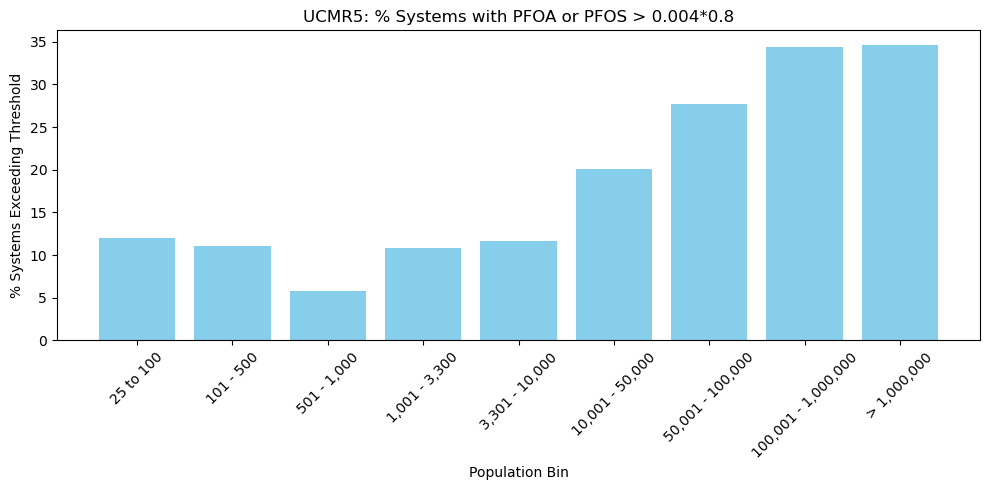

In [38]:
plt.figure(figsize=(10,5))
plt.bar(ucmr5_summary['population_bin'], ucmr5_summary['percent_systems_exceeding_threshold'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('% Systems Exceeding Threshold')
plt.xlabel('Population Bin')
plt.title('UCMR5: % Systems with PFOA or PFOS > 0.004*0.8')
plt.tight_layout()
plt.show()

This table (`memo_table2`) is based on Table 2 in the AWWA technical memorandum. It summarizes the number of impacted entry points (both groundwater (GW) and surface water (SW)) in each population bin. These numbers are used to estimate the percentage of water systems in each bin that would require treatment according to the memorandum.  

- `GW_entry_points`: Number of impacted groundwater entry points in each population bin.  
- `SW_entry_points`: Number of impacted surface water entry points in each population bin.  
- `total_entry_points`: Total impacted entry points (GW + SW) for the population bin.  

Reference: AWWA technical memorandum  
Source: Updating National Cost Estimate for PFAS Standards using UCMR‑5  
See: [AWWA Memo](https://www.awwa.org/wp-content/uploads/Final-Technical-Memorandum-Updating-National-Cost-Estimate-for-PFAS-Standards-using-UCMR-5.pdf)

In [39]:
# Create Table 2 from AWWA memo
# Contains population bins, number of groundwater (GW) and surface water (SW) entry points impacted
memo_table2 = pd.DataFrame({
    'population_bin': bin_order,
    'GW_entry_points': [1471, 1680, 449, 620, 451, 390, 92, 105, 27],
    'SW_entry_points': [91, 198, 111, 231, 217, 403, 170, 265, 28]
})

In [40]:
# Calculates total entry points as the sum of GW and SW
memo_table2['total_entry_points'] = memo_table2['GW_entry_points'] + memo_table2['SW_entry_points']

In [41]:
memo_table2

,population_bin,GW_entry_points,SW_entry_points,total_entry_points
0,25 to 100,1471,91,1562
1,101 - 500,1680,198,1878
2,"501 - 1,000",449,111,560
3,"1,001 - 3,300",620,231,851
4,"3,301 - 10,000",451,217,668
5,"10,001 - 50,000",390,403,793
6,"50,001 - 100,000",92,170,262
7,"100,001 - 1,000,000",105,265,370
8,"> 1,000,000",27,28,55


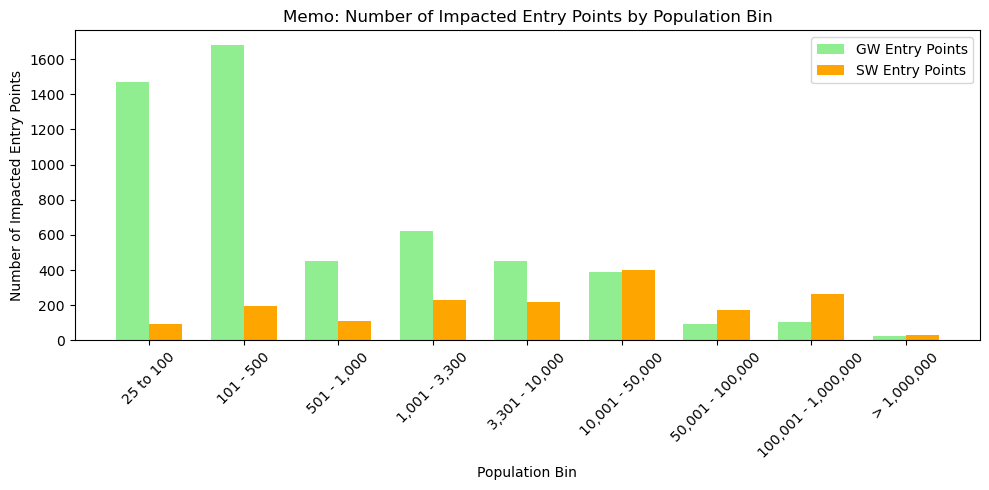

In [42]:
x = np.arange(len(memo_table2['population_bin']))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, memo_table2['GW_entry_points'], width, label='GW Entry Points', color='lightgreen')
plt.bar(x + width/2, memo_table2['SW_entry_points'], width, label='SW Entry Points', color='orange')
plt.xticks(x, memo_table2['population_bin'], rotation=45)
plt.ylabel('Number of Impacted Entry Points')
plt.xlabel('Population Bin')
plt.title('Memo: Number of Impacted Entry Points by Population Bin')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
comparison = ucmr5_summary.merge(memo_table2, on='population_bin', how='left')

In [44]:
comparison

,population_bin,total_systems,exceed_systems,percent_systems_exceeding_threshold,GW_entry_points,SW_entry_points,total_entry_points
0,25 to 100,75,9,12.000000,1471,91,1562
1,101 - 500,109,12,11.009174,1680,198,1878
2,"501 - 1,000",223,13,5.829596,449,111,560
3,"1,001 - 3,300",461,50,10.845987,620,231,851
4,"3,301 - 10,000",4440,519,11.689189,451,217,668
5,"10,001 - 50,000",3409,684,20.064535,390,403,793
6,"50,001 - 100,000",574,159,27.700348,92,170,262
7,"100,001 - 1,000,000",454,156,34.361233,105,265,370
8,"> 1,000,000",26,9,34.615385,27,28,55
